# Predict the fare amount of future rides using regression analysis

## **Problem Statement**

The fare amount of a ride is influenced by various factors such as distance, ride duration, traffic conditions, time of day, and demand. The goal of this project is to develop a regression model that can accurately predict the fare amount based on these factors using historical ride data. By analyzing and modeling these features, we aim to provide insights into fare pricing and enhance predictive capabilities for future ride fares.

## Task 1: Load and Explore the Dataset

In this task, we will load the dataset and perform an initial exploratory data analysis (EDA) to understand the structure and characteristics of the data.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv("C:/Users/Admin/Downloads/uber.csv")

In [3]:
# Examine the structure of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
# View the first few rows of the dataset
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
# Understand the statistics of numerical features
df.describe() 

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
# Check for missing values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


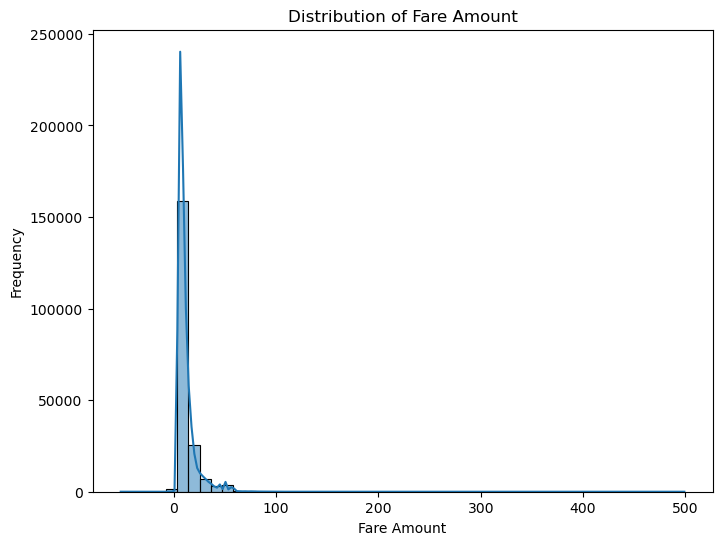

In [7]:
# Examine the distribution of the target variable (fare_amount)

plt.figure(figsize=(8, 6))
sns.histplot(df['fare_amount'], bins=50, kde=True)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Check for potential outliers in fare_amount
df['fare_amount'].describe()

count    200000.000000
mean         11.359955
std           9.901776
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64

## Task 2: Handle Missing Data
Missing data can adversely affect the performance of your regression model. In this task, we'll identify missing values and handle them appropriately.

In [9]:
# Identify Missing Values
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
# Handle Missing Values by Dropping Rows
df = df.dropna(subset=['dropoff_longitude', 'dropoff_latitude'])

In [11]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Task 3: Feature Engineering
Creating new features can significantly enhance the predictive power of your model. We'll derive features such as the hour of the day, day of the week, and the distance between pickup and dropoff points.

In [12]:
# Examine the structure of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [13]:
# Convert 'pickup_datetime' to Datetime Object
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [14]:
# Extract Time-Based Features
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek  
df['month'] = df['pickup_datetime'].dt.month

In [15]:
# Calculate Distance Using Haversine Formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Apply the function to calculate distance for each row
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

# Display the first few rows to verify
df[['pickup_datetime', 'hour', 'day_of_week', 'month', 'distance_km']].head()

,pickup_datetime,hour,day_of_week,month,distance_km
0,2015-05-07 19:52:06+00:00,19,3,5,1.683323
1,2009-07-17 20:04:56+00:00,20,4,7,2.457590
2,2009-08-24 21:45:00+00:00,21,0,8,5.036377
3,2009-06-26 08:22:21+00:00,8,4,6,1.661683
4,2014-08-28 17:47:00+00:00,17,3,8,4.475450


In [16]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,distance_km
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,4.475450


## Task 4: Split the Dataset

Splitting the dataset into training and testing sets is crucial for evaluating the model's performance on unseen data.

In [17]:
from sklearn.model_selection import train_test_split

# Exclude columns that won't be used as features
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
            'passenger_count', 'hour', 'day_of_week', 'month', 'distance_km']
X = df[features]
y = df['fare_amount']

In [18]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 5: Data Scaling/Normalization

Scaling features ensures that all input variables contribute equally to the model's performance, especially important for algorithms sensitive to feature scales.

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Task 6: Correlation Analysis

Understanding the relationships between features and the target variable can help in feature selection and understanding the data better.

In [20]:
# Combine features and target for correlation
corr_matrix = df[features + ['fare_amount']].corr()

# Display the correlation matrix
print(corr_matrix['fare_amount'].sort_values(ascending=False))

fare_amount          1.000000
distance_km          0.024684
month                0.023813
pickup_longitude     0.010458
passenger_count      0.010158
dropoff_longitude    0.008986
day_of_week          0.007508
pickup_latitude     -0.008482
dropoff_latitude    -0.011014
hour                -0.021463
Name: fare_amount, dtype: float64


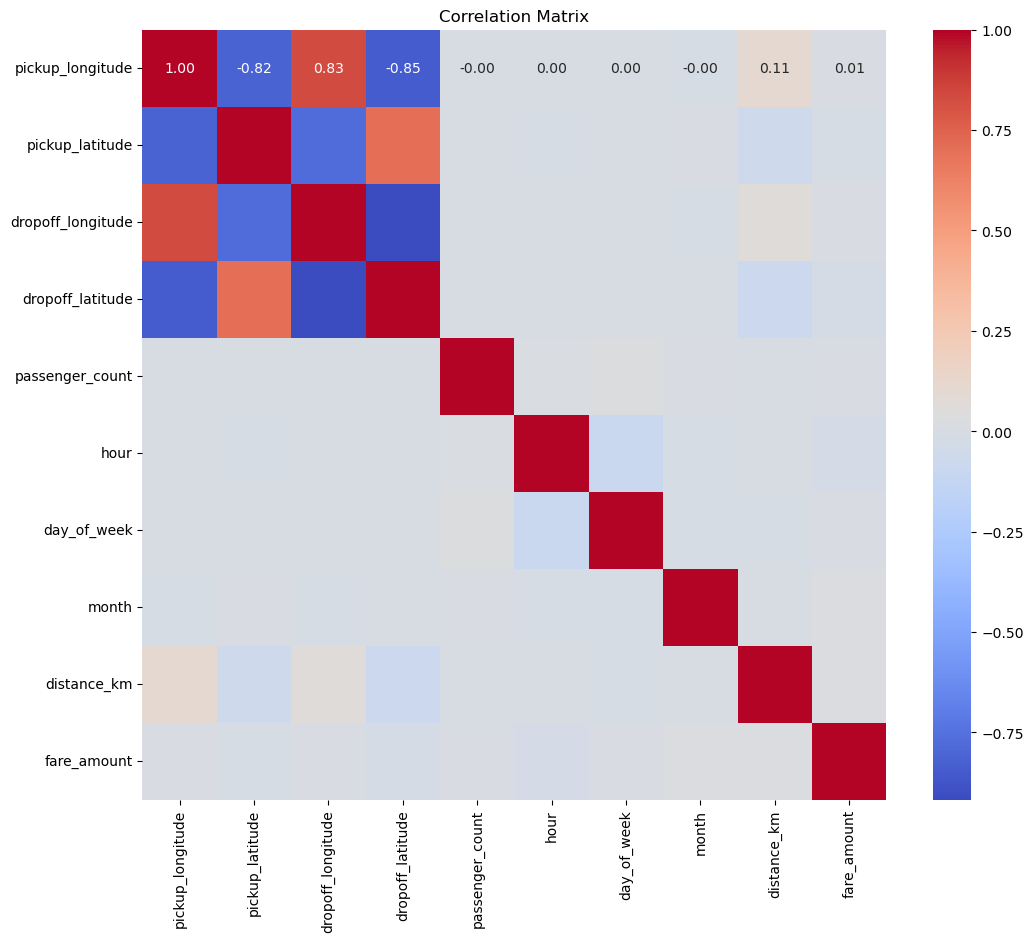

In [21]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

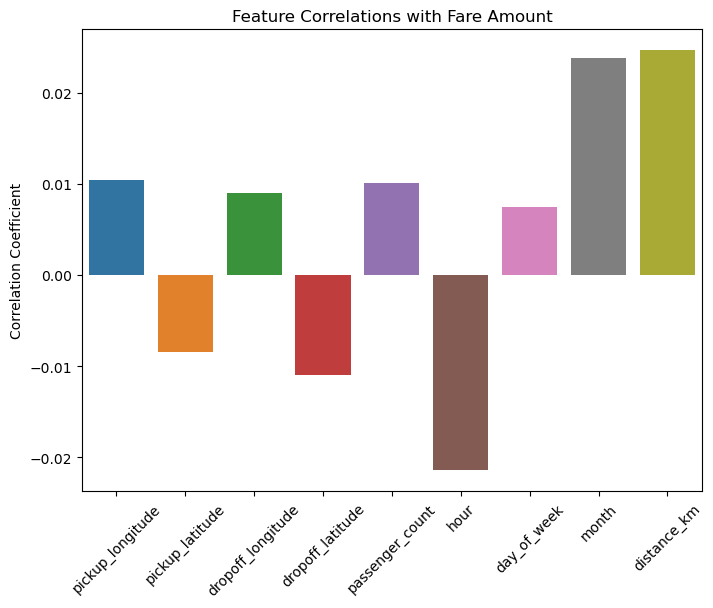

In [22]:
# Visualize only correlations with the target variable
plt.figure(figsize=(8, 6))
fare_corr = corr_matrix['fare_amount'].drop('fare_amount')  
sns.barplot(x=fare_corr.index, y=fare_corr.values)
plt.xticks(rotation=45)
plt.title('Feature Correlations with Fare Amount')
plt.ylabel('Correlation Coefficient')
plt.show()

## Task 7: Select and Train the Regression Model

In this task, we select and train several regression models, including Linear Regression, Decision Tree Regressor and Random Forest Regressor. By training multiple models, we aim to compare their performance and identify the best-suited model for predicting ride fares.

In [23]:
# Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [24]:
# Initialize the models
lr_model = LinearRegression()
dt_model = DecisionTreeRegressor(random_state=42)
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

In [25]:
# Train the models on the training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [26]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [27]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

## Task 8: Evaluate the Regression Model

We evaluate the performance of each trained model using metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared. This allows us to assess the accuracy of predictions and determine which model performs best.

In [28]:
# Evaluate the Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Predict on the test set using each model
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_rf = rf_model.predict(X_test_scaled)

### Linear Regression

In [30]:
# Evaluate Linear Regression
print("Linear Regression:")
print(f'MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'R²: {r2_score(y_test, y_pred_lr)}')

Linear Regression:
MSE: 103.8506336243117
MAE: 6.06315801295797
R²: 0.001665967392131651


### Decision Tree Regressor

In [31]:
# Evaluate Decision Tree Regressor
print("\nDecision Tree Regressor:")
print(f'MSE: {mean_squared_error(y_test, y_pred_dt)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_dt)}')
print(f'R²: {r2_score(y_test, y_pred_dt)}')


Decision Tree Regressor:
MSE: 54.39542221171663
MAE: 3.091784002976191
R²: 0.47708743493580597


### Random Forest Regressor

In [32]:
# Evaluate Random Forest Regressor
print("\nRandom Forest Regressor:")
print(f'MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'R²: {r2_score(y_test, y_pred_rf)}')


Random Forest Regressor:
MSE: 33.13617203356572
MAE: 2.3909055947745306
R²: 0.681456269480927


## Task 9: Fine-tuning the Model 

To enhance the model's accuracy, I fine-tuned its hyperparameters using RandomizedSearchCV. This method efficiently explores various hyperparameter combinations, helping to minimize prediction error while maintaining a balance between computational speed and model quality. By adjusting parameters like tree depth and the number of estimators, I aimed to further improve performance.

In [33]:
# Fine-tuning the Model
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Define the parameter grid for Random Forest 
param_dist_rf = {
    'n_estimators': [10, 20],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [35]:
# Use RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, 
                                      n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=10,
                                                   random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 20]},
                   random_state=42, verbose=2)

In [36]:
# Get the best parameters for Random Forest
best_params_rf = random_search_rf.best_params_
print(f"Best Parameters for Random Forest: {best_params_rf}")

Best Parameters for Random Forest: {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [37]:
# Define the parameter grid for Decision Tree
param_dist_dt = {
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [38]:
# Use RandomizedSearchCV for Decision Tree
random_search_dt = RandomizedSearchCV(estimator=dt_model, param_distributions=param_dist_dt, 
                                      n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search_dt.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5]},
                   random_state=42, verbose=2)

In [39]:
# Get the best parameters for Decision Tree
best_params_dt = random_search_dt.best_params_
print(f"Best Parameters for Decision Tree: {best_params_dt}")

Best Parameters for Decision Tree: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


In [40]:
# Re-train the models with the best parameters
rf_best_model = RandomForestRegressor(**best_params_rf, random_state=42)
dt_best_model = DecisionTreeRegressor(**best_params_dt, random_state=42)

rf_best_model.fit(X_train_scaled, y_train)
dt_best_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [41]:
# Evaluate fine-tuned Random Forest model
y_pred_rf_tuned = rf_best_model.predict(X_test_scaled)
print("\nFine-tuned Random Forest:")
print(f'MSE: {mean_squared_error(y_test, y_pred_rf_tuned)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_rf_tuned)}')
print(f'R²: {r2_score(y_test, y_pred_rf_tuned)}')


Fine-tuned Random Forest:
MSE: 29.944450553220836
MAE: 2.31288947917729
R²: 0.7121388379471045


In [42]:
# Evaluate fine-tuned Decision Tree model
y_pred_dt_tuned = dt_best_model.predict(X_test_scaled)
print("\nFine-tuned Decision Tree:")
print(f'MSE: {mean_squared_error(y_test, y_pred_dt_tuned)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred_dt_tuned)}')
print(f'R²: {r2_score(y_test, y_pred_dt_tuned)}')


Fine-tuned Decision Tree:
MSE: 32.98115625158089
MAE: 2.379848244611432
R²: 0.6829464628995499


In [43]:
# Evaluate performance on training set for Random Forest
y_train_pred_rf = rf_best_model.predict(X_train_scaled)
y_test_pred_rf = rf_best_model.predict(X_test_scaled)

In [44]:
# Training metrics for Random Forest
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Testing metrics for Random Forest
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

In [45]:
# Print training results
print(f"Random Forest Training MSE: {train_mse_rf}, MAE: {train_mae_rf}, R²: {train_r2_rf}")
print(f"Random Forest Testing MSE: {test_mse_rf}, MAE: {test_mae_rf}, R²: {test_r2_rf}")
r2_diff = abs(train_r2_rf - test_r2_rf)

if r2_diff > 0.1:
    print(f"Warning: Potential overfitting or underfitting detected. R² difference: {r2_diff:.4f}")
else:
    print(f"Model appears well-fitted. R² difference: {r2_diff:.4f}")

Random Forest Training MSE: 16.735378946351766, MAE: 2.1322014196645376, R²: 0.8266647632430737
Random Forest Testing MSE: 29.944450553220836, MAE: 2.31288947917729, R²: 0.7121388379471045


## Task 11: Interpret Feature Importance
Analyzing the importance of features helps us understand which variables have the most significant influence on fare prediction. We'll interpret the significance of features using regression models such as Random Forest.

In [46]:
# Get feature importance from the Random Forest model
feature_importances = rf_best_model.feature_importances_

In [47]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

In [48]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

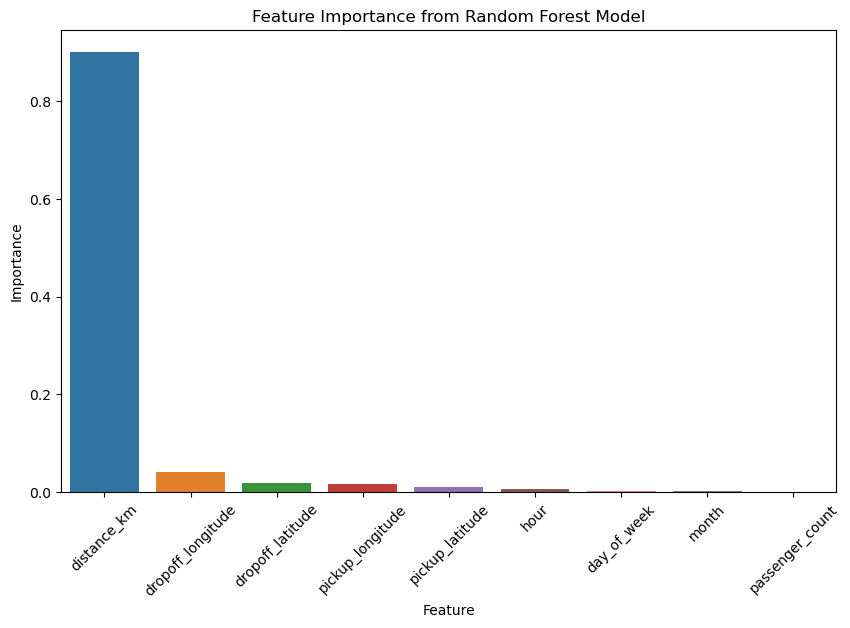

In [52]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xticks(rotation=45)
plt.show()

In [51]:
print(importance_df.head())

             Feature  Importance
8        distance_km    0.900901
2  dropoff_longitude    0.040165
3   dropoff_latitude    0.018583
0   pickup_longitude    0.017088
1    pickup_latitude    0.010221


## Task 12: Make Predictions on New Data

Once the model is trained, it can be used to predict the fare amount for unseen data. In this task, we’ll demonstrate how to predict using the test data as a proxy for new data.

In [53]:
# Predict on test data (simulating new data)
new_data_predictions = rf_best_model.predict(X_test_scaled)

In [54]:
# Compare predicted values with actual test data
comparison_df = pd.DataFrame({
    'Actual Fare': y_test,
    'Predicted Fare': new_data_predictions
})

In [55]:
# Display a few predictions
print("Sample Predictions:")
print(comparison_df.head())

Sample Predictions:
        Actual Fare  Predicted Fare
134253          6.5        7.745872
124141          4.1        5.246443
62810          12.0       11.624738
65425           7.5        9.424256
30074           4.1        5.082870


In [56]:
# Calculate evaluation metrics for new data
print(f'\nMSE (Test/New Data): {mean_squared_error(y_test, new_data_predictions)}')
print(f'MAE (Test/New Data): {mean_absolute_error(y_test, new_data_predictions)}')
print(f'R² (Test/New Data): {r2_score(y_test, new_data_predictions)}')


MSE (Test/New Data): 29.944450553220836
MAE (Test/New Data): 2.31288947917729
R² (Test/New Data): 0.7121388379471045


## Recommendations Based on Regression Model Insights:

### 1. Dynamic Pricing Strategy:

-The model’s **R² score of 0.71** shows that it can predict a significant portion of fare variability. To maximize revenue, the company can implement dynamic pricing based on factors like time of day, traffic, and demand. For example, higher fares can be applied during peak hours or in high-demand zones.

### 2. Driver Incentives:

-Given the **MAE of 2.31**, the average fare prediction error is relatively small. However, to minimize the impact of pricing fluctuations, incentivize drivers during predicted high-demand periods to increase supply. This could include bonuses or surge pricing adjustments.

### 3. Service Enhancements:

-Use the model’s predictions to **optimize ride allocation**. By predicting high-demand locations, the company can deploy more drivers to areas where the model identifies potential fare increases, improving service availability and reducing customer wait times.

### 4. Continuous Model Refinement:

-The model can be improved by incorporating additional features, such as **weather conditions, traffic incidents, and local events**. Regular updates based on these new factors will help ensure the model stays relevant and accurate over time.


These strategies, driven by the model’s predictions, can help optimize pricing, improve customer experience, and streamline driver operations.